<a href="https://colab.research.google.com/github/ptk18/Machine-Learning/blob/main/65011466_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Homework 2: Artificial Neural Networks**

> Add blockquote



### **1. Clustering Data by LVQ**

In [1]:
!pip install numpy matplotlib scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

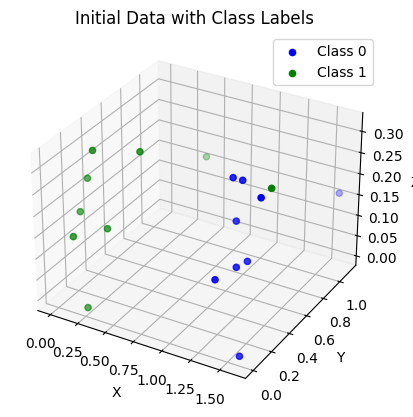

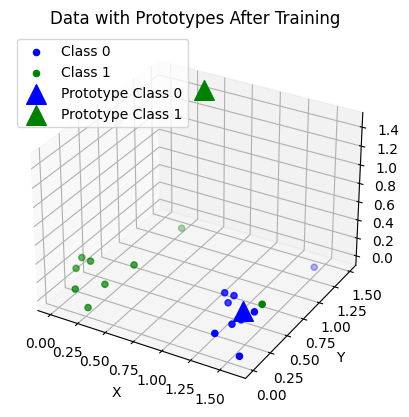

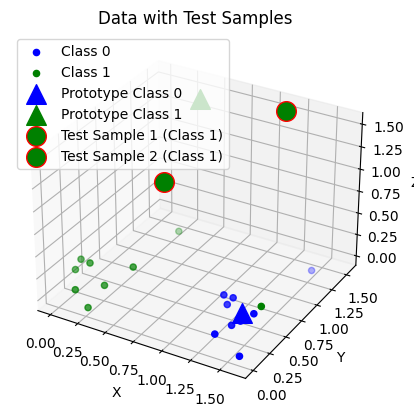

In [11]:
#load the dataset
data = np.loadtxt('Cluster.csv', delimiter=',', skiprows=1)
X = data[:, :-1] # features
y = data[:, -1] # labels (last column)

def euclidean_distance(a,b):
  return np.sqrt(np.sum((a - b) ** 2))

# LVQ Algorithm
class LVQ:
  def __init__(self, prototypes, learning_rate=0.01):
    self.prototypes = prototypes
    self.learning_rate = learning_rate

  def winner(self, x):
    distances = [euclidean_distance(x, p) for p in self.prototypes]
    return np.argmin(distances)

  def update_prototypes(self, X, y):
    for i, x in enumerate(X):
      winner_idx = self.winner(x)
      if y[i] == winner_idx:
        self.prototypes[winner_idx] += self.learning_rate * (x - self.prototypes[winner_idx])
      else:
        self.prototypes[winner_idx] -= self.learning_rate * (x - self.prototypes[winner_idx])

  def fit(self, X, y, epochs = 100):
    for epoch in range(epochs):
      self.update_prototypes(X, y)

  def predict(self, X):
    return np.array([self.winner(x) for x in X])

# Plot initial data
def plot_3d_data(X, y, prototypes=None, title="3D Scatter Plot"):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  class_0 = X[y == 0]
  class_1 = X[y == 1]

  ax.scatter(class_0[:, 0], class_0[:, 1], class_0[:, 2], c='b', label='Class 0')
  ax.scatter(class_1[:, 0], class_0[:, 1], class_0[:, 2], c='g', label='Class 1')

  if prototypes is not None:
    ax.scatter(prototypes[0][0], prototypes[0][1], prototypes[0][2], c='b', marker='^', s=200, label='Prototype Class 0')
    ax.scatter(prototypes[1][0], prototypes[1][1], prototypes[1][2], c='g', marker='^', s=200, label='Prototype Class 1')

  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.legend()
  plt.show()

prototype_class_0 = X[y == 0][0]
prototype_class_1 = X[y == 1][0]
prototypes = np.array([prototype_class_0, prototype_class_1])

plot_3d_data(X, y, title="Initial Data with Class Labels")

lvq = LVQ(prototypes, learning_rate=0.01)
lvq.fit(X, y, epochs=100)

trained_prototypes = lvq.prototypes

plot_3d_data(X, y, prototypes=trained_prototypes, title="Data with Prototypes After Training")

test_samples = np.array([[1.116, 1.551, 1.516], [0.5,0.75, 1.00]])

test_predictions = lvq.predict(test_samples)

def plot_with_test_samples(X, y, prototypes, test_samples, test_predictions):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  class_0 = X[y == 0]
  class_1 = X[y == 1]

  ax.scatter(class_0[:, 0], class_0[:, 1], class_0[:, 2], c='b', label='Class 0')
  ax.scatter(class_1[:, 0], class_0[:, 1], class_0[:, 2], c='g', label='Class 1')

  ax.scatter(prototypes[0][0], prototypes[0][1], prototypes[0][2], c='b', marker='^', s=200, label='Prototype Class 0')
  ax.scatter(prototypes[1][0], prototypes[1][1], prototypes[1][2], c='g', marker='^', s=200, label='Prototype Class 1')

  for i, sample in enumerate(test_samples):
    color = 'b' if test_predictions[i] == 0 else 'g'
    ax.scatter(sample[0], sample[1], sample[2], c=color, marker='o', s=200, edgecolor='r', label=f'Test Sample {i+1} (Class {test_predictions[i]})')

  ax.set_title("Data with Test Samples")
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.legend()
  plt.show()

plot_with_test_samples(X, y, trained_prototypes, test_samples, test_predictions)


### **2. Self-organizing Map on the Iris Dataset**

In [12]:
!pip install numpy matplotlib scikit-learn minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=d945d43e8d3e1bc17a32119b880c5f2355c09835852311efbd7e800e8f2e71bc
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


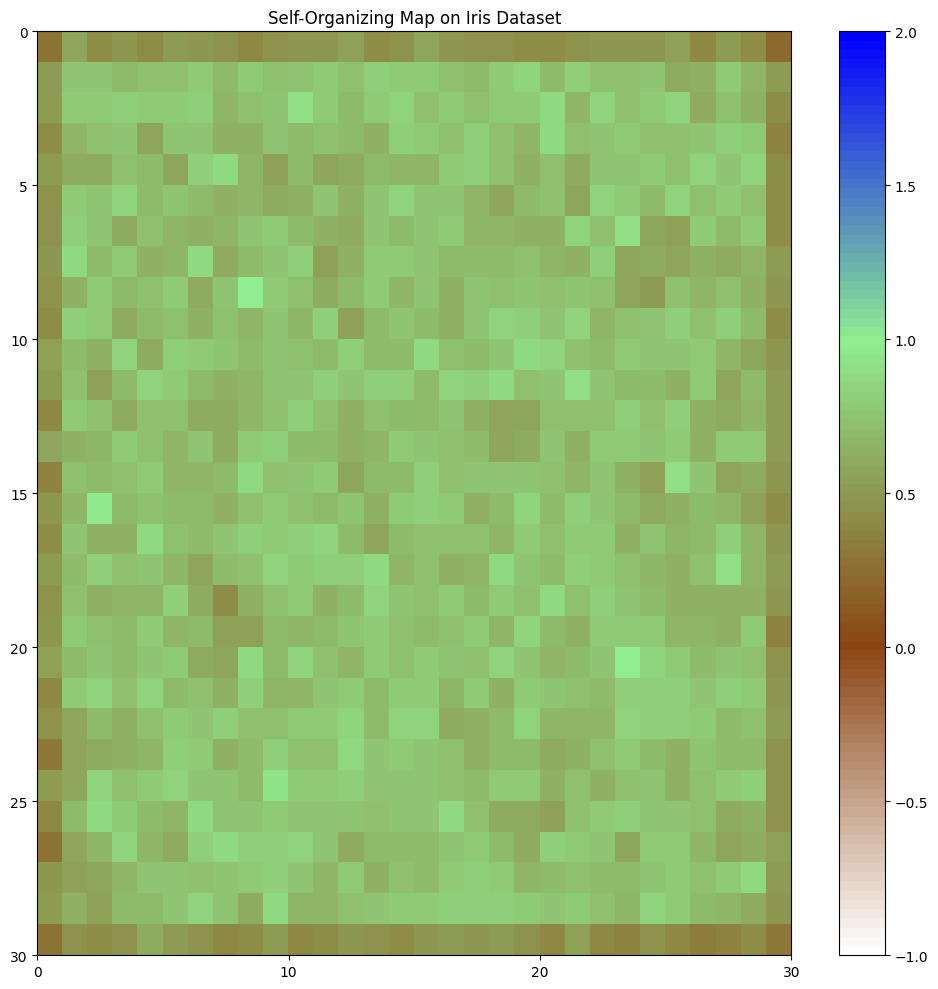

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from minisom import MiniSom
from matplotlib.colors import LinearSegmentedColormap

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Initialize and train the SOM
som_shape = (30, 30)
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=0.3, learning_rate=0.5)
som.train_random(X, 10000)

# Generate the distance map
distance_map = som.distance_map()

# Create a custom colormap
colors = ['#FFFFFF', '#8B4513', '#90EE90', '#0000FF']  # White, Brown, Light Green, Blue
n_bins = 100
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Plot the results
plt.figure(figsize=(10, 10))
plt.pcolor(distance_map.T, cmap=custom_cmap, vmin=-1, vmax=2)
plt.colorbar()

# Set x-axis ticks
plt.xticks([0, 10, 20, 30])

# Set y-axis ticks
plt.yticks([0, 5, 10, 15, 20, 25, 30])

# Title and axis adjustment
plt.title('Self-Organizing Map on Iris Dataset')
plt.gca().invert_yaxis()
plt.xlim(0,30)
plt.ylim(30,0)
plt.tight_layout()
plt.show()

### **3. Radial Basis Function**

In [40]:
!pip install scikit-learn tensorflow matplotlib numpy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Centers: 10, Train Accuracy: 0.3955, Test Accuracy: 0.4075


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Centers: 30, Train Accuracy: 0.2380, Test Accuracy: 0.2428


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Centers: 50, Train Accuracy: 0.5197, Test Accuracy: 0.5295


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Centers: 70, Train Accuracy: 0.4736, Test Accuracy: 0.4751


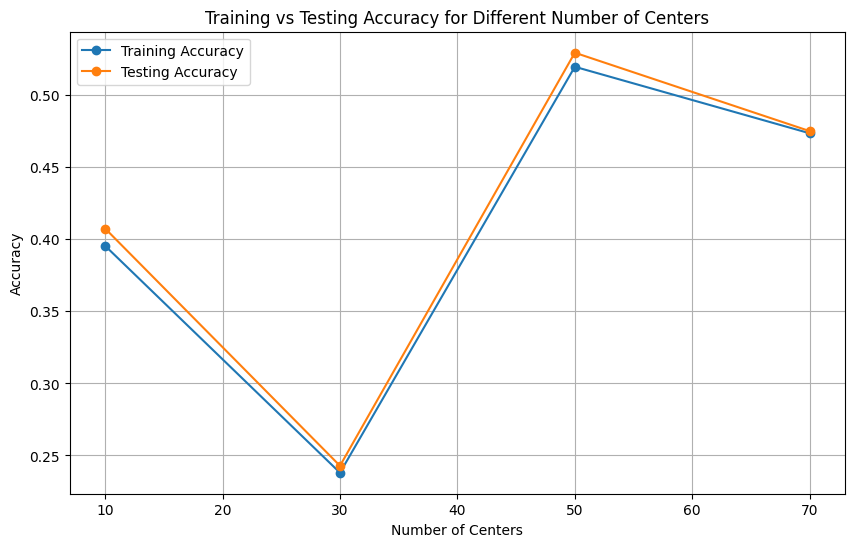

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics.pairwise import rbf_kernel

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing data
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Function to create RBF model
def create_rbf_model(num_centers, X_train, X_test, y_train, y_test):
    # Apply KMeans to find centers
    kmeans = KMeans(n_clusters=num_centers)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Transform the input space using RBF kernel
    X_train_rbf = rbf_kernel(X_train, centers)
    X_test_rbf = rbf_kernel(X_test, centers)

    # Build a simple neural network
    model = Sequential([
        Dense(10, input_shape=(num_centers,), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_rbf, y_train, epochs=10, verbose=0)

    # Evaluate the model
    train_acc = model.evaluate(X_train_rbf, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test_rbf, y_test, verbose=0)[1]

    return train_acc, test_acc

# Number of centers to experiment with
centers_list = [10, 30, 50, 70]
train_accuracies = []
test_accuracies = []

# Evaluate the model for each number of centers
for num_centers in centers_list:
    train_acc, test_acc = create_rbf_model(num_centers, X_train, X_test, y_train, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"Centers: {num_centers}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(centers_list, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(centers_list, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training vs Testing Accuracy for Different Number of Centers')
plt.xlabel('Number of Centers')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
